lstm7

결과요약: RMSE: 0.15565380454063416  sales를 root를 취한 후 normalize한다.

lstm7 seed 7:[step: 499] loss: 1.4705324172973633
RMSE: 0.1105978786945343
lstm7, seed 77: [step: 499] loss: 1.408486008644104
RMSE: 0.13130713999271393


log를 이용했을 때의 시도: [step: 499] loss: 1.981953740119934
RMSE: 0.15565380454063416

시도 내용 요약:
주중(1)/주말(2) + 겨울(1)봄(2)여름(3)가을(4) // 

이미 lstm이라는 것이 sequence 개념이 있으므로 시간축(1~397)를 feature로 설정하는 것은 의미가 없을 듯 하여 제외함

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import pandas as pd
tf.set_random_seed(7)


In [2]:
columns=['date','sales']
#2는 판매량 중 0의 값이 그대로
txs=pd.read_table('./lstmData/lstmPrac2.csv', sep=',',header=None,names=columns ) 

#3는 판매량 중 0의 값이 1로 대체
# txs=pd.read_table('./lstmData/lstmPrac3.csv', sep=',',header=None,names=columns )
txs.info()
txs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
date     397 non-null object
sales    397 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


,date,sales
0,2016-01-01,34
1,2016-01-02,41
2,2016-01-03,54
3,2016-01-04,41
4,2016-01-05,35


In [3]:
from datetime import datetime                    

# 1. 기본 feature

In [4]:
year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year  
day_of_week = lambda x: datetime.strptime(x, "%Y-%m-%d" ).weekday()
month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
# please read docs on how week numbers are calculate
week_number = lambda x: datetime.strptime(x, "%Y-%m-%d" ).strftime('%V')

# 2. 추가 feature

In [5]:
seasons = [0,0,1,1,1,2,2,2,3,3,3,0] #dec - feb is winter, then spring, summer, fall etc
season = lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d" ).month-1)]

In [6]:
txs['year'] = txs['date'].map(year)
txs['month']=txs['date'].map(month)
txs['week_number']=txs['date'].map(week_number)
txs['season']=txs['date'].map(season)
txs['day_of_week']=txs['date'].map(day_of_week)
txs

,date,sales,year,month,week_number,season,day_of_week
0,2016-01-01,34,2016,1,53,0,4
1,2016-01-02,41,2016,1,53,0,5
2,2016-01-03,54,2016,1,53,0,6
3,2016-01-04,41,2016,1,01,0,0
4,2016-01-05,35,2016,1,01,0,1
5,2016-01-06,44,2016,1,01,0,2
6,2016-01-07,50,2016,1,01,0,3
7,2016-01-08,42,2016,1,01,0,4
8,2016-01-09,42,2016,1,01,0,5
9,2016-01-10,66,2016,1,01,0,6


pandas를 통해 구한 각 feature는 list()로 우리의 기준type인 list로 변경이 가능

# 3. 추가 가공

## 3.1 y의 추가 가공

In [7]:
xySales=txs['sales']
xySales=list(xySales)

### 이상점 제거

이상점 제거의 기준이 무척 주관적일 수 있으므로 제외하는 것이 좋을 수도 있어 lstm6는 이상점 제거를 하지 않았다.

normalization, bucketization 을 하여 새로운 열을 생성하는 방향으로

### log

In [8]:
x=[1,4,9]
y=np.sqrt(x)

In [9]:
y

array([ 1.,  2.,  3.])

In [10]:
xySales

[34,
 41,
 54,
 41,
 35,
 44,
 50,
 42,
 42,
 66,
 50,
 55,
 56,
 53,
 44,
 54,
 54,
 50,
 40,
 49,
 28,
 72,
 71,
 53,
 43,
 38,
 55,
 49,
 43,
 49,
 49,
 44,
 39,
 52,
 45,
 33,
 43,
 40,
 46,
 49,
 50,
 37,
 37,
 45,
 48,
 48,
 38,
 60,
 31,
 35,
 53,
 70,
 62,
 48,
 51,
 49,
 38,
 32,
 39,
 35,
 30,
 36,
 31,
 31,
 44,
 41,
 41,
 45,
 46,
 45,
 41,
 47,
 48,
 40,
 42,
 38,
 38,
 45,
 48,
 62,
 46,
 38,
 62,
 81,
 40,
 45,
 42,
 53,
 53,
 56,
 53,
 47,
 61,
 64,
 62,
 37,
 65,
 54,
 44,
 46,
 50,
 43,
 53,
 63,
 52,
 2,
 0,
 0,
 72,
 59,
 75,
 47,
 44,
 77,
 90,
 93,
 47,
 61,
 77,
 282,
 50,
 58,
 33,
 41,
 36,
 64,
 49,
 53,
 60,
 43,
 41,
 55,
 45,
 18,
 60,
 69,
 54,
 39,
 50,
 44,
 54,
 57,
 82,
 57,
 44,
 56,
 51,
 55,
 28,
 56,
 54,
 36,
 12,
 25,
 41,
 11,
 6,
 9,
 230,
 29,
 24,
 23,
 14,
 21,
 20,
 25,
 23,
 27,
 31,
 16,
 14,
 30,
 32,
 75,
 35,
 26,
 12,
 21,
 23,
 28,
 25,
 31,
 21,
 17,
 10,
 29,
 34,
 28,
 20,
 36,
 23,
 15,
 42,
 28,
 24,
 29,
 20,
 14,
 18,
 27,
 22

In [11]:
xySales=np.sqrt(xySales)
xySales

array([  5.83095189,   6.40312424,   7.34846923,   6.40312424,
         5.91607978,   6.63324958,   7.07106781,   6.4807407 ,
         6.4807407 ,   8.1240384 ,   7.07106781,   7.41619849,
         7.48331477,   7.28010989,   6.63324958,   7.34846923,
         7.34846923,   7.07106781,   6.32455532,   7.        ,
         5.29150262,   8.48528137,   8.42614977,   7.28010989,
         6.55743852,   6.164414  ,   7.41619849,   7.        ,
         6.55743852,   7.        ,   7.        ,   6.63324958,
         6.244998  ,   7.21110255,   6.70820393,   5.74456265,
         6.55743852,   6.32455532,   6.78232998,   7.        ,
         7.07106781,   6.08276253,   6.08276253,   6.70820393,
         6.92820323,   6.92820323,   6.164414  ,   7.74596669,
         5.56776436,   5.91607978,   7.28010989,   8.36660027,
         7.87400787,   6.92820323,   7.14142843,   7.        ,
         6.164414  ,   5.65685425,   6.244998  ,   5.91607978,
         5.47722558,   6.        ,   5.56776436,   5.56

### Normalization

In [12]:
def MinMaxScaler(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)

In [13]:
xySales=MinMaxScaler(xySales)

## 합쳐서 최종 input XY생성

In [14]:
tempxy=[list(txs['season']),list(txs['day_of_week']),list(txs['week_number']),xySales]

In [15]:
tempxy

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [16]:
xy=np.array(tempxy)

In [17]:
xy

array([['0', '0', '0', ..., '0', '0', '0'],
       ['4', '5', '6', ..., '6', '0', '1'],
       ['53', '53', '53', ..., '04', '05', '05'],
       ['0.24423169799870814', '0.26819736008924794',
        '0.30779350433634106', ..., '0.0', '0.09365858076587677',
        '0.23320798540505683']], 
      dtype='<U32')

In [18]:
temp=xy.transpose()

In [19]:
temp

array([['0', '4', '53', '0.24423169799870814'],
       ['0', '5', '53', '0.26819736008924794'],
       ['0', '6', '53', '0.30779350433634106'],
       ..., 
       ['0', '6', '04', '0.0'],
       ['0', '0', '05', '0.09365858076587677'],
       ['0', '1', '05', '0.23320798540505683']], 
      dtype='<U32')

In [20]:
xy = temp.astype(np.float)

In [21]:
xy

array([[  0.        ,   4.        ,  53.        ,   0.2442317 ],
       [  0.        ,   5.        ,  53.        ,   0.26819736],
       [  0.        ,   6.        ,  53.        ,   0.3077935 ],
       ..., 
       [  0.        ,   6.        ,   4.        ,   0.        ],
       [  0.        ,   0.        ,   5.        ,   0.09365858],
       [  0.        ,   1.        ,   5.        ,   0.23320799]])

[[  0.           4.          53.           0.2442317 ]
 [  0.           5.          53.           0.26819736]
 [  0.           6.          53.           0.3077935 ]
 [  0.           0.           1.           0.26819736]
 [  0.           1.           1.           0.24779731]
 [  0.           2.           1.           0.27783625]
 [  0.           3.           1.           0.29617444]] -> [ 0.27144836]
[[  0.           5.          53.           0.26819736]
 [  0.           6.          53.           0.3077935 ]
 [  0.           0.           1.           0.26819736]
 [  0.           1.           1.           0.24779731]
 [  0.           2.           1.           0.27783625]
 [  0.           3.           1.           0.29617444]
 [  0.           4.           1.           0.27144836]] -> [ 0.27144836]
[[  0.           6.          53.           0.3077935 ]
 [  0.           0.           1.           0.26819736]
 [  0.           1.           1.           0.24779731]
 [  0.           2.          

 [ 1.          1.          9.          0.22941573]] -> [ 0.25131234]
[[ 0.          3.          8.          0.29319773]
 [ 0.          4.          8.          0.25819889]
 [ 0.          5.          8.          0.23693955]
 [ 0.          6.          8.          0.26157418]
 [ 0.          0.          9.          0.24779731]
 [ 1.          1.          9.          0.22941573]
 [ 1.          2.          9.          0.25131234]] -> [ 0.23320799]
[[ 0.          4.          8.          0.25819889]
 [ 0.          5.          8.          0.23693955]
 [ 0.          6.          8.          0.26157418]
 [ 0.          0.          9.          0.24779731]
 [ 1.          1.          9.          0.22941573]
 [ 1.          2.          9.          0.25131234]
 [ 1.          3.          9.          0.23320799]] -> [ 0.23320799]
[[ 0.          5.          8.          0.23693955]
 [ 0.          6.          8.          0.26157418]
 [ 0.          0.          9.          0.24779731]
 [ 1.          1.          9

[step: 0] loss: 38.888694763183594
[step: 1] loss: 27.54237937927246
[step: 2] loss: 19.635835647583008
[step: 3] loss: 13.70219612121582
[step: 4] loss: 9.220329284667969
[step: 5] loss: 6.143516540527344
[step: 6] loss: 4.481597423553467
[step: 7] loss: 4.078797817230225
[step: 8] loss: 4.430511474609375
[step: 9] loss: 4.835812091827393
[step: 10] loss: 4.905844211578369
[step: 11] loss: 4.64968729019165
[step: 12] loss: 4.196613311767578
[step: 13] loss: 3.6709094047546387
[step: 14] loss: 3.1752521991729736
[step: 15] loss: 2.7734251022338867
[step: 16] loss: 2.4844136238098145
[step: 17] loss: 2.2948384284973145
[step: 18] loss: 2.178248882293701
[step: 19] loss: 2.108682632446289
[step: 20] loss: 2.0663671493530273
[step: 21] loss: 2.038696765899658
[step: 22] loss: 2.0189037322998047
[step: 23] loss: 2.0040435791015625
[step: 24] loss: 1.9931973218917847
[step: 25] loss: 1.9861700534820557
[step: 26] loss: 1.982701301574707
[step: 27] loss: 1.9820830821990967
[step: 28] loss: 1

[step: 233] loss: 1.6977598667144775
[step: 234] loss: 1.6972463130950928
[step: 235] loss: 1.696730613708496
[step: 236] loss: 1.6962122917175293
[step: 237] loss: 1.695691466331482
[step: 238] loss: 1.6951687335968018
[step: 239] loss: 1.6946427822113037
[step: 240] loss: 1.6941137313842773
[step: 241] loss: 1.6935820579528809
[step: 242] loss: 1.6930471658706665
[step: 243] loss: 1.6925084590911865
[step: 244] loss: 1.6919656991958618
[step: 245] loss: 1.691420078277588
[step: 246] loss: 1.6908692121505737
[step: 247] loss: 1.6903142929077148
[step: 248] loss: 1.6897540092468262
[step: 249] loss: 1.689189076423645
[step: 250] loss: 1.6886190176010132
[step: 251] loss: 1.6880431175231934
[step: 252] loss: 1.687461495399475
[step: 253] loss: 1.6868727207183838
[step: 254] loss: 1.6862776279449463
[step: 255] loss: 1.6856755018234253
[step: 256] loss: 1.685065507888794
[step: 257] loss: 1.684447169303894
[step: 258] loss: 1.6838209629058838
[step: 259] loss: 1.6831854581832886
[step: 2

[step: 473] loss: 1.486857295036316
[step: 474] loss: 1.4861477613449097
[step: 475] loss: 1.4854456186294556
[step: 476] loss: 1.4847508668899536
[step: 477] loss: 1.484063744544983
[step: 478] loss: 1.4833831787109375
[step: 479] loss: 1.4827097654342651
[step: 480] loss: 1.4820435047149658
[step: 481] loss: 1.481384038925171
[step: 482] loss: 1.4807311296463013
[step: 483] loss: 1.480084776878357
[step: 484] loss: 1.4794448614120483
[step: 485] loss: 1.4788110256195068
[step: 486] loss: 1.4781838655471802
[step: 487] loss: 1.4775623083114624
[step: 488] loss: 1.4769467115402222
[step: 489] loss: 1.4763370752334595
[step: 490] loss: 1.4757329225540161
[step: 491] loss: 1.4751343727111816
[step: 492] loss: 1.474541187286377
[step: 493] loss: 1.4739532470703125
[step: 494] loss: 1.4733710289001465
[step: 495] loss: 1.4727933406829834
[step: 496] loss: 1.4722211360931396
[step: 497] loss: 1.4716533422470093
[step: 498] loss: 1.4710904359817505
[step: 499] loss: 1.4705324172973633
RMSE: 

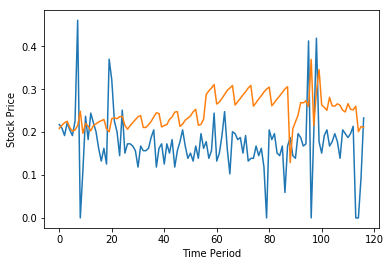

[step: 0] loss: 38.888694763183594
[step: 1] loss: 27.54237937927246
[step: 2] loss: 19.635835647583008
[step: 3] loss: 13.70219612121582
[step: 4] loss: 9.220329284667969
[step: 5] loss: 6.143516540527344
[step: 6] loss: 4.481597423553467
[step: 7] loss: 4.078797817230225
[step: 8] loss: 4.430511474609375
[step: 9] loss: 4.835812091827393
[step: 10] loss: 4.905844211578369
[step: 11] loss: 4.64968729019165
[step: 12] loss: 4.196613311767578
[step: 13] loss: 3.6709094047546387
[step: 14] loss: 3.1752521991729736
[step: 15] loss: 2.7734251022338867
[step: 16] loss: 2.4844136238098145
[step: 17] loss: 2.2948384284973145
[step: 18] loss: 2.178248882293701
[step: 19] loss: 2.108682632446289
[step: 20] loss: 2.0663671493530273
[step: 21] loss: 2.038696765899658
[step: 22] loss: 2.0189037322998047
[step: 23] loss: 2.0040435791015625
[step: 24] loss: 1.9931973218917847
[step: 25] loss: 1.9861700534820557
[step: 26] loss: 1.982701301574707
[step: 27] loss: 1.9820830821990967
[step: 28] loss: 1

[step: 230] loss: 1.6992905139923096
[step: 231] loss: 1.6987818479537964
[step: 232] loss: 1.6982722282409668
[step: 233] loss: 1.6977598667144775
[step: 234] loss: 1.6972463130950928
[step: 235] loss: 1.696730613708496
[step: 236] loss: 1.6962122917175293
[step: 237] loss: 1.695691466331482
[step: 238] loss: 1.6951687335968018
[step: 239] loss: 1.6946427822113037
[step: 240] loss: 1.6941137313842773
[step: 241] loss: 1.6935820579528809
[step: 242] loss: 1.6930471658706665
[step: 243] loss: 1.6925084590911865
[step: 244] loss: 1.6919656991958618
[step: 245] loss: 1.691420078277588
[step: 246] loss: 1.6908692121505737
[step: 247] loss: 1.6903142929077148
[step: 248] loss: 1.6897540092468262
[step: 249] loss: 1.689189076423645
[step: 250] loss: 1.6886190176010132
[step: 251] loss: 1.6880431175231934
[step: 252] loss: 1.687461495399475
[step: 253] loss: 1.6868727207183838
[step: 254] loss: 1.6862776279449463
[step: 255] loss: 1.6856755018234253
[step: 256] loss: 1.685065507888794
[step: 

[step: 470] loss: 1.4890328645706177
[step: 471] loss: 1.4882994890213013
[step: 472] loss: 1.4875744581222534
[step: 473] loss: 1.486857295036316
[step: 474] loss: 1.4861477613449097
[step: 475] loss: 1.4854456186294556
[step: 476] loss: 1.4847508668899536
[step: 477] loss: 1.484063744544983
[step: 478] loss: 1.4833831787109375
[step: 479] loss: 1.4827097654342651
[step: 480] loss: 1.4820435047149658
[step: 481] loss: 1.481384038925171
[step: 482] loss: 1.4807311296463013
[step: 483] loss: 1.480084776878357
[step: 484] loss: 1.4794448614120483
[step: 485] loss: 1.4788110256195068
[step: 486] loss: 1.4781838655471802
[step: 487] loss: 1.4775623083114624
[step: 488] loss: 1.4769467115402222
[step: 489] loss: 1.4763370752334595
[step: 490] loss: 1.4757329225540161
[step: 491] loss: 1.4751343727111816
[step: 492] loss: 1.474541187286377
[step: 493] loss: 1.4739532470703125
[step: 494] loss: 1.4733710289001465
[step: 495] loss: 1.4727933406829834
[step: 496] loss: 1.4722211360931396
[step:

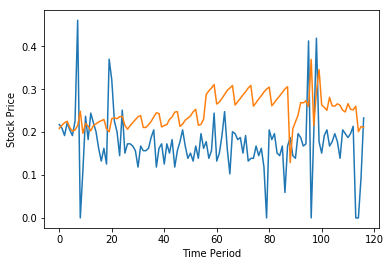

In [22]:
#train parameters
seq_length=7
data_dim=4
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500
#기본형식
#기본 인자로는 ds-y로 받고 
#처리함수에서 ds를 받아서 'feature 처리모듈'에서 ds에서 요일(주중, 주말), 월(계절) + 날씨와 같은 추가 요인-값을 받는다.


x=xy
y=xy[:,[-1]]

#build a dataset
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

#input place holders
X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, 1])
# build a LSTM network(input: cell shape, type/ )
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# use the last cell's output to calculate Y_pred
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=tf.tanh) 
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()
